# Exploratory Data Analysis

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.0f' % x)
sns.set_palette("Set1", 8, .75)

## Anime Dataset

In [2]:
# import anime dataset
anime_df = pd.read_csv("datasets/cleaned_anime.csv")
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9,793665
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,114262
2,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9,673572
3,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,151266
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9,93351


In [70]:
anime_df

(3787, 7)

In [161]:
from collections import Counter


sum(anime_df[anime_df["genre"].isnull() == False]["genre"].str.split(", ").apply(Counter), Counter())


Counter({'Action': 1098,
         'Adventure': 932,
         'Drama': 697,
         'Fantasy': 765,
         'Magic': 353,
         'Military': 133,
         'Shounen': 712,
         'Comedy': 1870,
         'Historical': 275,
         'Parody': 126,
         'Samurai': 51,
         'Sci-Fi': 774,
         'Thriller': 34,
         'School': 567,
         'Sports': 240,
         'Super Power': 190,
         'Romance': 652,
         'Slice of Life': 562,
         'Supernatural': 431,
         'Mecha': 379,
         'Music': 123,
         'Mystery': 222,
         'Seinen': 235,
         'Space': 123,
         'Vampire': 46,
         'Shoujo': 283,
         'Horror': 113,
         'Police': 50,
         'Psychological': 89,
         'Ecchi': 245,
         'Josei': 32,
         'Game': 103,
         'Martial Arts': 95,
         'Demons': 89,
         'Harem': 175,
         'Dementia': 9,
         'Shounen Ai': 24,
         'Cars': 36,
         'Kids': 484,
         'Shoujo Ai': 31})

In [3]:
# measures of central tendencies
anime_df[["episodes", "rating", "members"]].describe()

,episodes,rating,members
count,3578,3671,3787
mean,36,7,42684
std,81,1,89121
min,2,3,12
25%,12,6,483
50%,24,7,5947
75%,39,7,44246
max,1818,10,1013917


In [4]:
# modes of each numerical category
mode = anime_df[["episodes", "rating", "members"]].mode()
mode.rename(index={0: "mode"})

,episodes,rating,members
mode,12,6,102


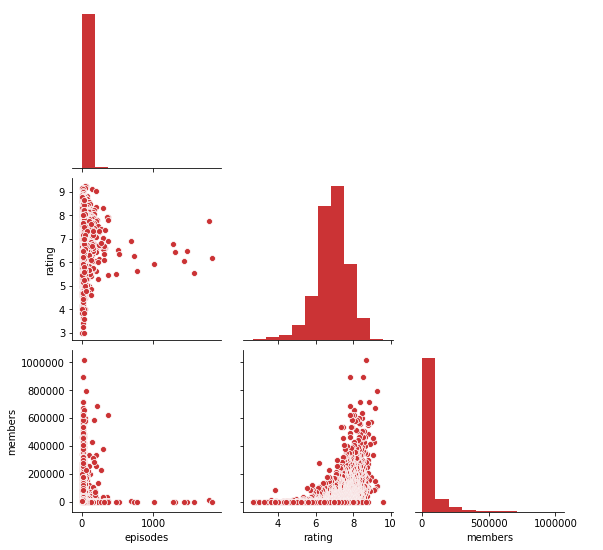

In [5]:
# pairplot
sns.pairplot(data = anime_df, vars=["episodes","rating", "members"], corner=True)

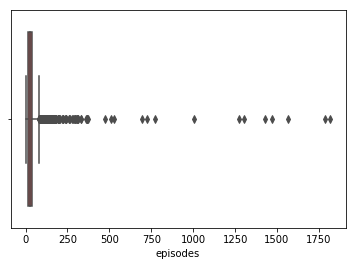

In [6]:
sns.boxplot(data=anime_df, x="episodes")

Looking at the histograms on the pair plot, we see that the distribution of ratings for shows seem to be **slightly left skewed** while the number of members seem to be **heavily right skewed**. These are also supported by the measures of central tendency. For the ratings, we see a **mode of 6**, a **median of 7**, and a **mean of 7**. Although numerically it seems reasonably symmetrically distributed, we say that visually it is quite obviously left skewed. This is most likely because the range of values is very small and so the distribution of the ratings data is not obvious when only using the mean, median, and mode. On the other hand the number of members has a **mode of 102**, **median of 5947**, and a **mean of 42684** justifying the assumption that it is heavily right skewed. The histogram for the number of episodes has extremely low frequencies of animes with high numbers of episodes however, looking at the boxplot and the numerical data, we see that the distribution is **left skewed** with a **mode of 12**, a **median of 24**, and a **mean of 36**.

All three distributions of the numerical data may suggest that some form of transformation may be required before building the recommendation system.

Regarding any correlations, it seems that there are no obvious correlations between the number of episodes and the amount of members, and also there seems to be no clear correlation between number of episodes and their average ratings. There does seem to a possible weak positive exponential relationship between the average rating a show gets compared to the number of members.  

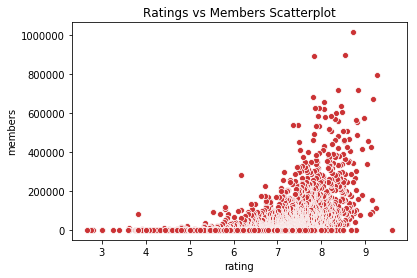

In [16]:
#plo
sns.scatterplot(data=anime_df, x="rating", y="members")
plt.title("Ratings vs Members Scatterplot")
plt.show()